In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
squish_df = pd.read_csv("processed_results/squish.csv")["squish"]

In [57]:
rgb_df = pd.read_csv("processed_results/aggregated_measurements_rgb.csv")
black_df = pd.read_csv("processed_results/aggregated_measurements_black.csv")
yellow_df = pd.read_csv("processed_results/aggregated_measurements_yellow.csv")

In [29]:
control_mask = rgb_df["trt"] == 'C'
apple_mask = rgb_df["trt"] == 'A'
tomato_mask = rgb_df["trt"] == 'T'

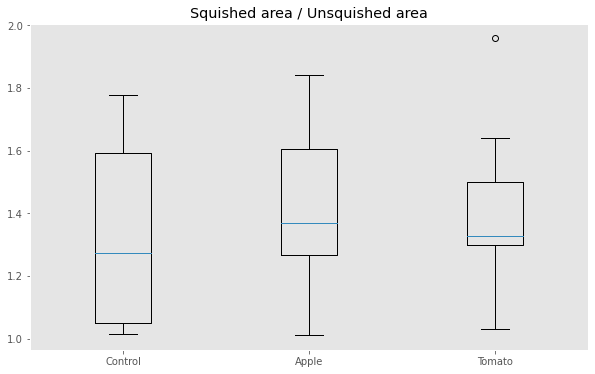

In [54]:

squish_dict = {"Control": squish_df[control_mask], 
             "Apple": squish_df[apple_mask], 
             "Tomato": squish_df[tomato_mask]}


plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
ax.boxplot(squish_dict.values())
ax.set_xticklabels(squish_dict.keys())
plt.title("Squished area / Unsquished area")

plt.savefig("plots/squish_ratios_boxplot.png")
plt.show()

In [160]:
name_2_mask={"Control": control_mask, "Apple": apple_mask, "Tomato": tomato_mask}

def plot_metric_as_time_series(df, name_2_mask=name_2_mask, colors=("r", "g", "b"), 
                               title=None, ylab=None, one_plot=True, figsize=(30, 8)):
    
    day_range = range(1, 6)
    
    if one_plot:
        plt.figure(figsize=figsize)
        if title is not None:
            plt.title(title)
        if ylab is not None:
            plt.ylabel(ylab)

        plt.xticks(day_range, labels=["Day " + str(i) for i in day_range])

        for (name, mask), color in  zip(name_2_mask.items(), colors):
            for i, (_, row) in enumerate(df[mask].iloc[:, -5:].iterrows()):
                if i == 0:
                    plt.plot(day_range, row, color=color, label=name)
                else: 
                    plt.plot(day_range, row, color=color)
        plt.legend(fontsize=15)       

    else:
        yticks = np.round(np.linspace(df.iloc[:, -5:].min().min(), df.iloc[:, -5:].max().max(), 7), 3)
        fig, axs = plt.subplots(1, 3, figsize=figsize)
        if title is not None:
            fig.suptitle(title, fontsize=30)
            
        for ax, (name, mask), color in  zip(axs, name_2_mask.items(), colors):
            
            if ylab is not None:
                ax.ylabel(ylab)
        
            ax.set_xticks(day_range, labels=["Day " + str(i) for i in day_range], fontsize=15)
            for i, (_, row) in enumerate(df[mask].iloc[:, -5:].iterrows()):
                ax.plot(day_range, row, color=color)     
            ax.set_title(name, fontsize=20)
            ax.set_yticks(yticks, fontsize=30)
    plt.savefig(f'plots/{title}.png')
    plt.show()

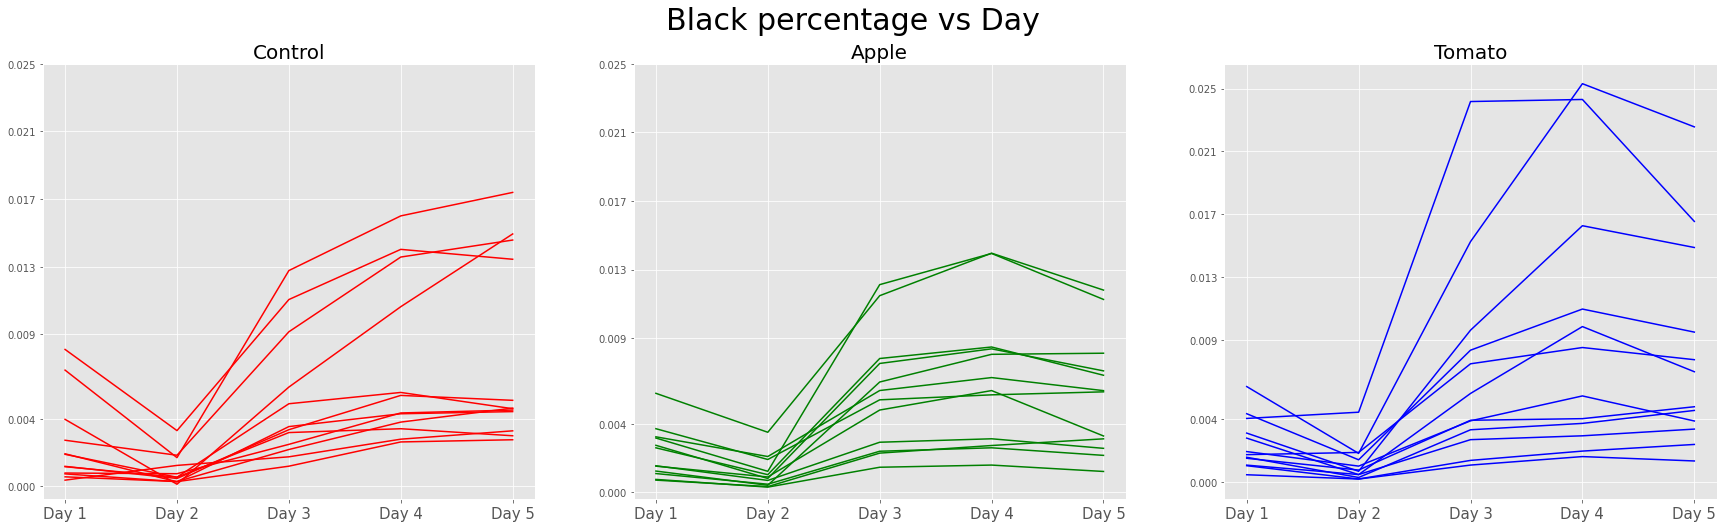

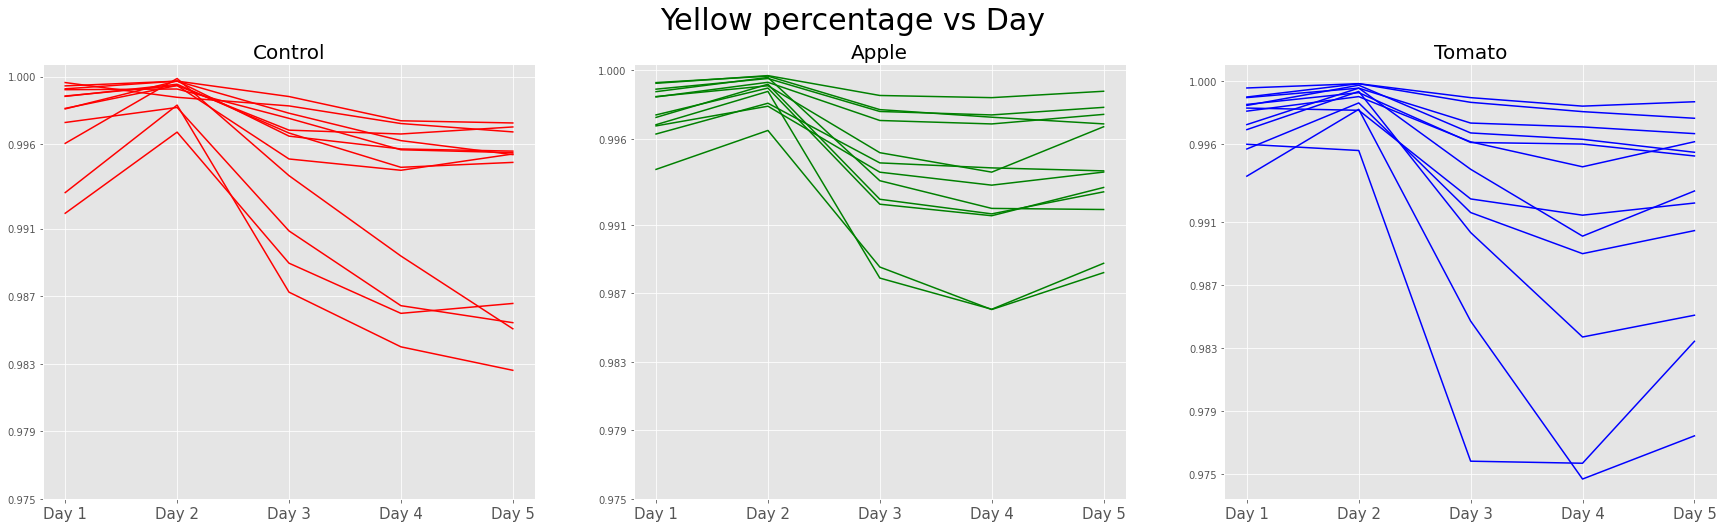

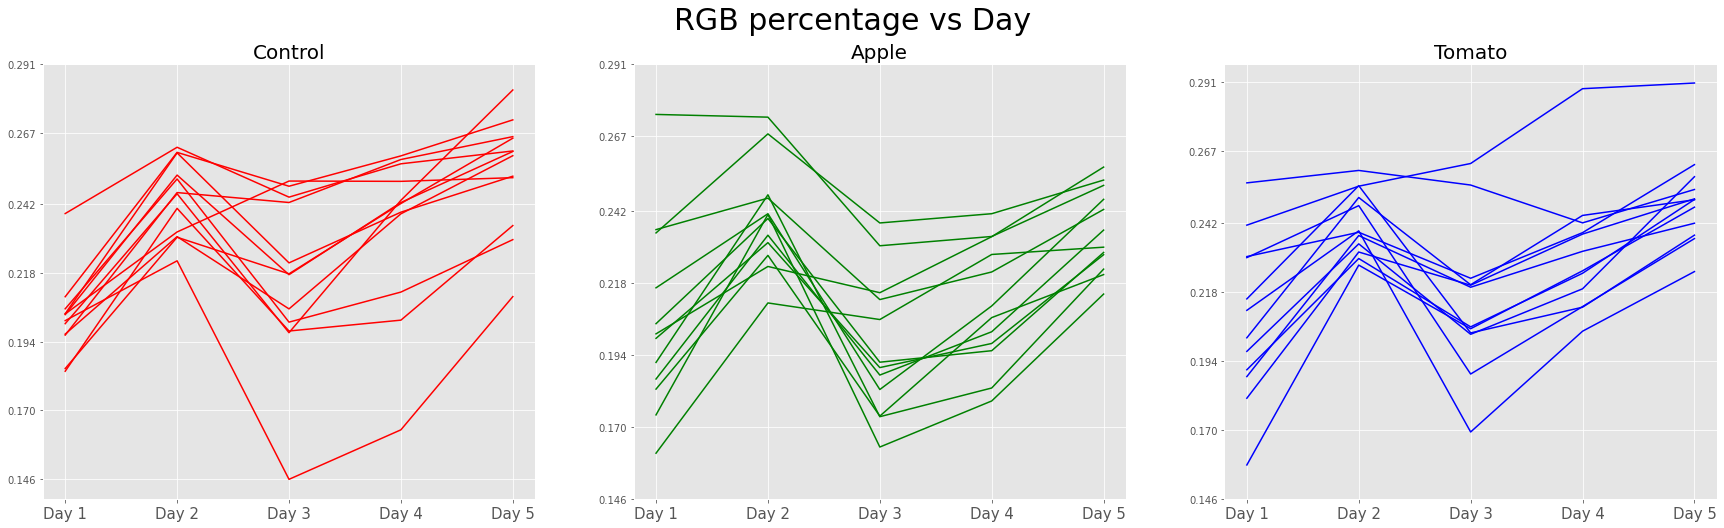

In [161]:
plot_metric_as_time_series(black_df, title="Black percentage vs Day", one_plot=False)
plot_metric_as_time_series(yellow_df, title="Yellow percentage vs Day", one_plot=False)
plot_metric_as_time_series(rgb_df, title="RGB percentage vs Day", one_plot=False)